In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import time
import random
import os
from math import *

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_percentage_error as MAPE
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error as MAE
from joblib import dump, load

In [ ]:
#data_path = '../datasets/'
df1 = pd.read_csv('pricing_requests_20req_eachdate.csv')
df2 = pd.read_csv('pricing_requests_34reqforlistdates.csv')
df3 = pd.read_csv('pricing_requests_92req_sofia.csv')
df4 = pd.read_csv('pricing_requests_92req_valletta.csv')
df5 = pd.read_csv('pricing_requests_100req.csv')
df6 = pd.read_csv('pricing_requests_500randomreq.csv')
df7 = pd.read_csv('pricing_requests_500randomreq_date1.csv')
df8 = pd.read_csv('pricing_requests_cities_3000_3100req.csv')
df9 = pd.read_csv('455_pricing_requests_date22_unzipped.csv')
df10 = pd.read_csv( 'pricing_requests_500_random.csv')
df11 = pd.read_csv( 'pricing_requests_22DATES.csv')
df12 = pd.read_csv( 'pricing_requests_500randomreq_date1.csv')
df13 = pd.read_csv( 'pricing_requests_5_random.csv')
df14 = pd.read_csv( 'pricing_requests_amsterdam40req.csv')
df15 = pd.read_csv( 'pricing_requests_dates_avatar0000.csv')
df16 = pd.read_csv( 'pricing_requests_dates_avatar0002.csv')
df17 = pd.read_csv( 'pricing_requests_languages_102-202req.csv')
df18 = pd.read_csv( 'pricing_requests_madrid40req.csv')
df19 = pd.read_csv( 'pricing_requests_rando

In [2]:
data_path = '../data/'
df2 = pd.read_csv(data_path+'pricing_requests_34reqforlistdates.csv')
df1 = pd.read_csv(data_path+'pricing_requests_20req_eachdate.csv')
df3 = pd.read_csv(data_path+'pricing_requests_92req_sofia.csv')
df4 = pd.read_csv(data_path+'pricing_requests_92req_valletta.csv')
df5 = pd.read_csv(data_path+'pricing_requests_100req.csv')
df6 = pd.read_csv(data_path+'pricing_requests_500randomreq.csv')
#df7 = pd.read_csv('pricing_requests_500randomreq_date1.csv')
df8 = pd.read_csv(data_path+'pricing_requests_cities_3000_3100req.csv')
#df9 = pd.read_csv('455_pricing_requests_date22_unzipped.csv')
#df10 = pd.read_csv('pricing_requests_500_random.csv')

In [18]:
df_complete_january_1 = pd.concat([df1, df2, df3, df4, df5, df6,  df8])#pd.concat([df1, df2, df3, df4, df5, df6, df7, df8, df9, df10,
                                 #df11, df12, df13, df14, df15, df16, df17, df18, df19])

In [19]:
df_complete_january = df_complete_january_1.drop_duplicates()

In [110]:
df_complete_january

,Unnamed: 0,hotel_id,price,stock,city,date,language,mobile,avatar_id
0,0,144,82,0,rome,0,cypriot,0,110364
1,1,651,116,0,rome,0,cypriot,0,110364
2,2,453,392,0,rome,0,cypriot,0,110364
3,3,583,74,0,rome,0,cypriot,0,110364
4,4,361,165,0,rome,0,cypriot,0,110364
...,...,...,...,...,...,...,...,...,...
11926,43,988,149,43,valletta,28,finnish,0,111563
11927,44,209,75,32,valletta,28,finnish,0,111563
11928,45,521,71,20,valletta,28,finnish,0,111563
11929,46,237,151,47,valletta,28,finnish,0,111563


In [20]:
features_hotels = pd.read_csv(data_path+'features_hotels.csv')
X_test = pd.read_csv(data_path+'test_set.csv')

In [21]:
#it's the same as in the original column
del features_hotels['city']

In [111]:
df = df_complete_january.join(features_hotels.set_index('hotel_id'), on='hotel_id')

In [116]:
pd.get_dummies(df)

,Unnamed: 0,hotel_id,price,stock,date,mobile,avatar_id,parking,pool,children_policy,...,brand_Ibas,brand_Independant,brand_J.Halliday Inn,brand_Marcure,brand_Morriot,brand_Navatel,brand_Quadrupletree,brand_Royal Lotus,brand_Safitel,brand_Tripletree
0,0,144,82,0,0,0,110364,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,651,116,0,0,0,110364,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,2,453,392,0,0,0,110364,0,0,2,...,0,0,0,0,0,0,0,0,0,0
3,3,583,74,0,0,0,110364,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,4,361,165,0,0,0,110364,0,0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11926,43,988,149,43,28,0,111563,1,0,0,...,0,0,1,0,0,0,0,0,0,0
11927,44,209,75,32,28,0,111563,1,0,0,...,0,1,0,0,0,0,0,0,0,0
11928,45,521,71,20,28,0,111563,1,0,0,...,1,0,0,0,0,0,0,0,0,0
11929,46,237,151,47,28,0,111563,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [23]:
X_test_features = X_test.join(features_hotels.set_index('hotel_id'), on='hotel_id')

In [24]:
df_complete_features

,Unnamed: 0,hotel_id,price,stock,city,date,language,mobile,avatar_id,group,brand,parking,pool,children_policy
0,0,144,82,0,rome,0,cypriot,0,110364,Yin Yang,8 Premium,0,0,0
1,1,651,116,0,rome,0,cypriot,0,110364,Independant,Independant,0,0,0
2,2,453,392,0,rome,0,cypriot,0,110364,Chillton Worldwide,Chill Garden Inn,0,0,2
3,3,583,74,0,rome,0,cypriot,0,110364,Accar Hotels,Ibas,0,0,0
4,4,361,165,0,rome,0,cypriot,0,110364,Boss Western,J.Halliday Inn,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11926,43,988,149,43,valletta,28,finnish,0,111563,Boss Western,J.Halliday Inn,1,0,0
11927,44,209,75,32,valletta,28,finnish,0,111563,Independant,Independant,1,0,0
11928,45,521,71,20,valletta,28,finnish,0,111563,Accar Hotels,Ibas,1,0,0
11929,46,237,151,47,valletta,28,finnish,0,111563,Morriott International,CourtYord,1,0,0


In [25]:
X_test_features

,index,order_requests,city,date,language,mobile,avatar_id,hotel_id,stock,group,brand,parking,pool,children_policy
0,0,1,vilnius,21,romanian,0,1,161,46,Boss Western,J.Halliday Inn,1,0,0
1,1,1,vilnius,21,romanian,0,1,187,32,Accar Hotels,Marcure,1,1,0
2,2,1,vilnius,21,romanian,0,1,279,12,Independant,Independant,1,0,0
3,3,1,vilnius,21,romanian,0,1,395,10,Accar Hotels,Ibas,0,0,0
4,4,1,vilnius,21,romanian,0,1,488,42,Accar Hotels,Safitel,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6639,6639,843,rome,5,irish,0,794,987,1,Accar Hotels,Ibas,1,0,0
6640,6640,844,vienna,1,irish,1,794,26,1,Accar Hotels,Marcure,1,0,0
6641,6641,844,vienna,1,irish,1,794,263,0,Boss Western,Boss Western,1,0,0
6642,6642,844,vienna,1,irish,1,794,456,0,Yin Yang,Ardisson,1,0,0


In [26]:
X_test_features = X_test_features.drop(X_test_features.columns[[0,1]], axis=1)
del X_test_features['avatar_id']
del X_test_features['hotel_id']

In [27]:
X_test_features

,city,date,language,mobile,stock,group,brand,parking,pool,children_policy
0,vilnius,21,romanian,0,46,Boss Western,J.Halliday Inn,1,0,0
1,vilnius,21,romanian,0,32,Accar Hotels,Marcure,1,1,0
2,vilnius,21,romanian,0,12,Independant,Independant,1,0,0
3,vilnius,21,romanian,0,10,Accar Hotels,Ibas,0,0,0
4,vilnius,21,romanian,0,42,Accar Hotels,Safitel,1,1,1
...,...,...,...,...,...,...,...,...,...,...
6639,rome,5,irish,0,1,Accar Hotels,Ibas,1,0,0
6640,vienna,1,irish,1,1,Accar Hotels,Marcure,1,0,0
6641,vienna,1,irish,1,0,Boss Western,Boss Western,1,0,0
6642,vienna,1,irish,1,0,Yin Yang,Ardisson,1,0,0


In [28]:
df_complete_features = df_complete_features.drop(df_complete_features.columns[[0]], axis=1)
del df_complete_features['avatar_id']
del df_complete_features['hotel_id']

In [29]:
df_complete_features

,price,stock,city,date,language,mobile,group,brand,parking,pool,children_policy
0,82,0,rome,0,cypriot,0,Yin Yang,8 Premium,0,0,0
1,116,0,rome,0,cypriot,0,Independant,Independant,0,0,0
2,392,0,rome,0,cypriot,0,Chillton Worldwide,Chill Garden Inn,0,0,2
3,74,0,rome,0,cypriot,0,Accar Hotels,Ibas,0,0,0
4,165,0,rome,0,cypriot,0,Boss Western,J.Halliday Inn,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
11926,149,43,valletta,28,finnish,0,Boss Western,J.Halliday Inn,1,0,0
11927,75,32,valletta,28,finnish,0,Independant,Independant,1,0,0
11928,71,20,valletta,28,finnish,0,Accar Hotels,Ibas,1,0,0
11929,151,47,valletta,28,finnish,0,Morriott International,CourtYord,1,0,0


In [31]:
price = df_complete_features['price']
df_complete_features.drop(df_complete_features.columns[[0]], axis=1)

,stock,city,date,language,mobile,group,brand,parking,pool,children_policy
0,0,rome,0,cypriot,0,Yin Yang,8 Premium,0,0,0
1,0,rome,0,cypriot,0,Independant,Independant,0,0,0
2,0,rome,0,cypriot,0,Chillton Worldwide,Chill Garden Inn,0,0,2
3,0,rome,0,cypriot,0,Accar Hotels,Ibas,0,0,0
4,0,rome,0,cypriot,0,Boss Western,J.Halliday Inn,0,0,0
...,...,...,...,...,...,...,...,...,...,...
11926,43,valletta,28,finnish,0,Boss Western,J.Halliday Inn,1,0,0
11927,32,valletta,28,finnish,0,Independant,Independant,1,0,0
11928,20,valletta,28,finnish,0,Accar Hotels,Ibas,1,0,0
11929,47,valletta,28,finnish,0,Morriott International,CourtYord,1,0,0


In [96]:
df_complete_features= pd.read_csv('df_final.csv')
df_complete_features = df_complete_features.drop(df_complete_features.columns[[0]], axis=1)

In [97]:
df_complete_features

,price,stock,city,date,language,mobile,group,brand,parking,pool,children_policy
0,199,10,0.104003,0,0.035092,1,0.220705,0.102295,1,0,1
1,47,0,0.066320,2,0.035784,1,0.148118,0.027807,1,0,0
2,82,0,0.110396,0,0.037171,0,0.148118,0.027807,0,0,0
3,113,0,0.123815,5,0.038371,0,0.096363,0.034954,1,0,0
4,167,5,0.108741,10,0.037856,1,0.096363,0.034954,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
645659,157,139,0.145921,44,0.037026,1,0.148118,0.056643,1,0,0
645660,180,197,0.145921,44,0.037026,1,0.186170,0.070994,1,0,0
645661,117,56,0.145921,44,0.037026,1,0.096363,0.034954,1,0,0
645662,264,280,0.145921,44,0.037026,1,0.186170,0.103972,0,1,1


In [98]:
prices = df_complete_features['price']
df_complete_features = df_complete_features.drop(df_complete_features.columns[[0]], axis=1)

In [99]:
df_complete_features

,stock,city,date,language,mobile,group,brand,parking,pool,children_policy
0,10,0.104003,0,0.035092,1,0.220705,0.102295,1,0,1
1,0,0.066320,2,0.035784,1,0.148118,0.027807,1,0,0
2,0,0.110396,0,0.037171,0,0.148118,0.027807,0,0,0
3,0,0.123815,5,0.038371,0,0.096363,0.034954,1,0,0
4,5,0.108741,10,0.037856,1,0.096363,0.034954,1,0,0
...,...,...,...,...,...,...,...,...,...,...
645659,139,0.145921,44,0.037026,1,0.148118,0.056643,1,0,0
645660,197,0.145921,44,0.037026,1,0.186170,0.070994,1,0,0
645661,56,0.145921,44,0.037026,1,0.096363,0.034954,1,0,0
645662,280,0.145921,44,0.037026,1,0.186170,0.103972,0,1,1


In [101]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_complete_features, prices, test_size=0.1, random_state=0)

In [102]:
X_test

,stock,city,date,language,mobile,group,brand,parking,pool,children_policy
488295,125,0.145921,34,0.037069,0,0.186170,0.103972,1,0,0
521596,67,0.082787,36,0.037245,1,0.133541,0.043815,0,0,0
630456,82,0.145921,40,0.037582,0,0.096363,0.034954,1,0,0
357297,25,0.141615,17,0.035092,1,0.148118,0.072381,1,1,0
144343,104,0.066320,39,0.038371,1,0.096363,0.034954,1,0,0
...,...,...,...,...,...,...,...,...,...,...
185788,3,0.141615,7,0.037671,1,0.133541,0.043815,0,0,0
584287,72,0.104003,37,0.037171,0,0.186170,0.042439,1,0,0
597420,153,0.145921,41,0.038211,1,0.148118,0.072381,0,1,0
617896,17,0.082787,27,0.036253,0,0.148118,0.027807,0,0,0


In [103]:
from xgboost import XGBRegressor

regressor = make_pipeline(
    StandardScaler(),
    XGBRegressor(learning_rate=0.01,  
                      colsample_bytree = 1,
                      subsample = 1,
                      n_estimators=1000, 
                      reg_alpha = 0.3,
                      max_depth=10, 
                      gamma=0),
)

In [104]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import QuantileTransformer, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor

lr = make_pipeline(
    StandardScaler(),
    LinearRegression(),
)

rf = make_pipeline(
    StandardScaler(),
    RandomForestRegressor(max_depth=10),
)


mlp = make_pipeline(
    StandardScaler(),
    MLPRegressor(hidden_layer_sizes=(100, 100), tol=1e-2, max_iter=500, random_state=0),
)

lr.fit(X_train, y_train)
print(f"Linear regression score: {lr.score(X_test, y_test):.2f}")
rf.fit(X_train, y_train)
print(f"Random forest score: {rf.score(X_test, y_test):.2f}")
mlp.fit(X_train, y_train)
print(f"MLP score: {mlp.score(X_test, y_test):.2f}")
regressor.fit(X_train, y_train)
print(f"Xgboost score: {regressor.score(X_test, y_test):.2f}")

Linear regression score: 0.87
Random forest score: 0.96
MLP score: 0.97
Xgboost score: 0.97


In [105]:
feature_names = list(df_complete_features.columns.values)

In [106]:
for c, feature_name in zip(lr[1].coef_, feature_names):
  print(feature_name, c)

stock -17.98088615886684
city 23.207519005193145
date -3.1194087606868934
language 3.3112150878990105
mobile -0.11621904647987265
group -1.9929820732894463
brand 70.08149837438359
parking -0.0734153297647546
pool 2.964658219177973
children_policy 0.7888205385900958


In [54]:
pip install pandas_profiling

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 328.7/328.7 kB 5.0 MB/s eta 0:00:003.7 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 31.0 MB/s eta 0:00:00m eta 0:00:010:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 3.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.8/679.8 kB 8.6 MB/s eta 0:00:00m eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 33.5 MB/s eta 0:00:00m eta 0:00:010:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 10.2 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27082 sha256=b05b110a24bd001642be88fd79acc3b00ecca276ec284b31286b6da0836f773f
  Stored in directory: /home/samih/.cache/pip/wheels/1d/05/04/c6d7d3b66539d9e659ac6dfe81e2d0fd4c1a8316cc5a403300
Successfully built htmlmin
  Consider adding this directory to PAT

In [73]:
from pandas_profiling import ProfileReport

ProfileReport(df_complete_features)
# if this cell returns an error restart the kernel and re-run the previous cells

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [75]:
pip install eli5

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.2/216.2 kB 3.6 MB/s eta 0:00:00 MB/s eta 0:00:01
  Preparing metadata (setup.py) ... done
  Using cached Jinja2-3.1.2-py3-none-any.whl (133 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.0/47.0 kB 720.8 kB/s eta 0:00:001m113.2 MB/s eta 0:00:01
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107728 sha256=11b89bcf7bb5e9a723027e7f19c1b88d45874f8654d58f2cf6a089052e889a13
  Stored in directory: /home/samih/.cache/pip/wheels/7b/26/a5/8460416695a992a2966b41caa5338e5e7fcea98c9d032d055c
Successfully built eli5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
anaconda-project 0.11.1 requires ruamel-yaml, which is not installed.
Note: you may need to restart the kernel to use updated packages.


In [80]:
permumtation_impor.feature_importances_

array([ 1.14039190e-03,  1.19193445e-03,  6.28510718e-04,  1.20952288e-03,
       -5.09917639e-06, -1.35062017e-05,  1.43539863e-05,  1.38132550e-03,
       -2.57073981e-05,  1.54115658e-05,  4.40312434e-06])

In [77]:
features_importance

{'Feature_name': ['stock',
  'city',
  'date',
  'language',
  'mobile',
  'group',
  'brand',
  'parking',
  'pool',
  'children_policy'],
 'Importance': array([ 1.14039190e-03,  1.19193445e-03,  6.28510718e-04,  1.20952288e-03,
        -5.09917639e-06, -1.35062017e-05,  1.43539863e-05,  1.38132550e-03,
        -2.57073981e-05,  1.54115658e-05,  4.40312434e-06])}

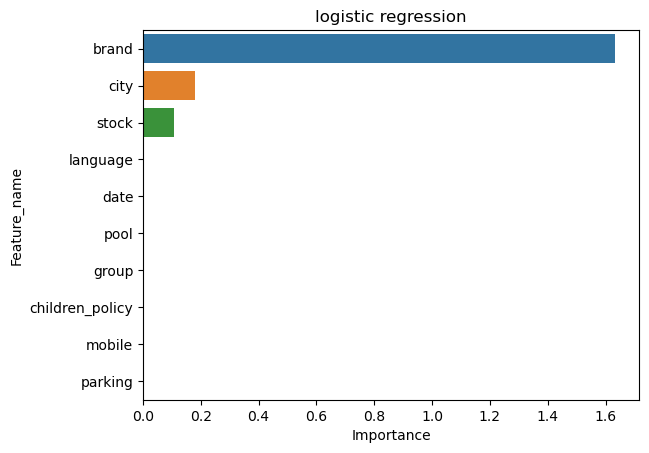

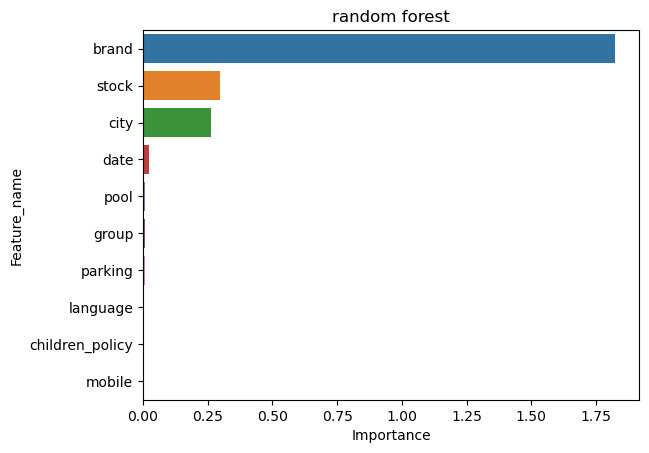

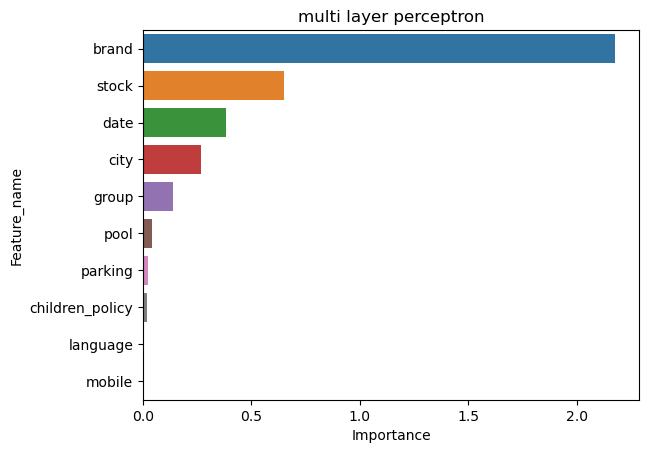

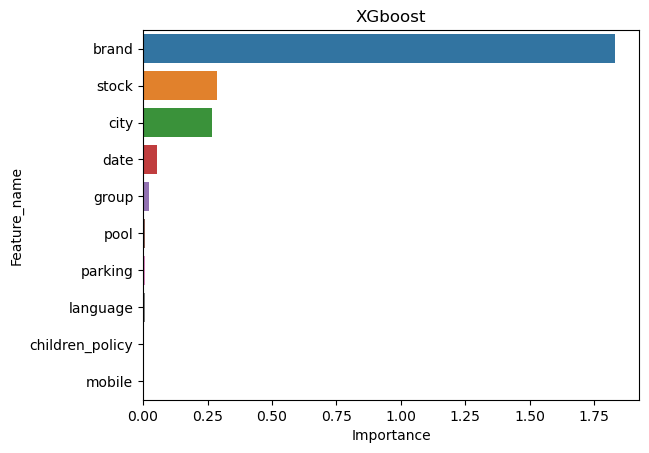

In [108]:
import eli5
from eli5.sklearn import PermutationImportance
import matplotlib.pyplot as plt
import seaborn as sns

features_importance_dict = {}
for model, name in zip([regressor], ['logistic regression', 'random forest', 'multi layer perceptron','XGboost']):
    plt.figure()
    permumtation_impor = PermutationImportance(model, random_state=0).fit(X_test, y_test)
    features_importance = {'Feature_name':feature_names, 'Importance':permumtation_impor.feature_importances_}  
    features_importance = pd.DataFrame(features_importance) 
    features_importance = features_importance.sort_values(['Importance'], ascending=False) 
    features_importance_dict[name] = features_importance
    ax = sns.barplot(x="Importance", y="Feature_name", data=features_importance)
    plt.title(name)

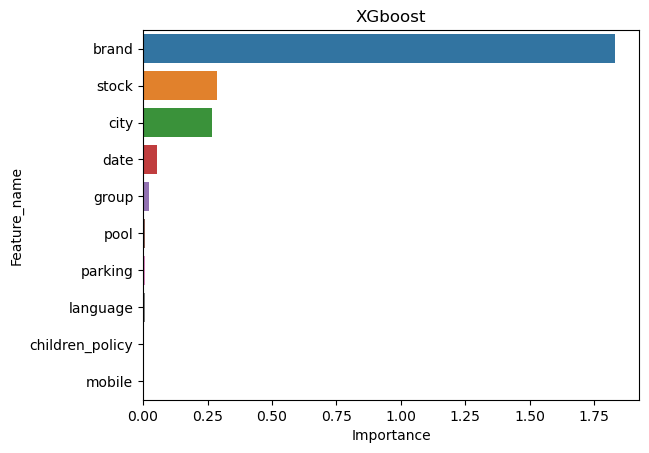

In [109]:
import eli5
from eli5.sklearn import PermutationImportance
import matplotlib.pyplot as plt
import seaborn as sns

features_importance_dict = {}
for model, name in zip([regressor], ['XGboost']):
    plt.figure()
    permumtation_impor = PermutationImportance(model, random_state=0).fit(X_test, y_test)
    features_importance = {'Feature_name':feature_names, 'Importance':permumtation_impor.feature_importances_}  
    features_importance = pd.DataFrame(features_importance) 
    features_importance = features_importance.sort_values(['Importance'], ascending=False) 
    features_importance_dict[name] = features_importance
    ax = sns.barplot(x="Importance", y="Feature_name", data=features_importance)
    plt.title(name)

/usr/local/insa/anaconda/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
/usr/local/insa/anaconda/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
/usr/local/insa/anaconda/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


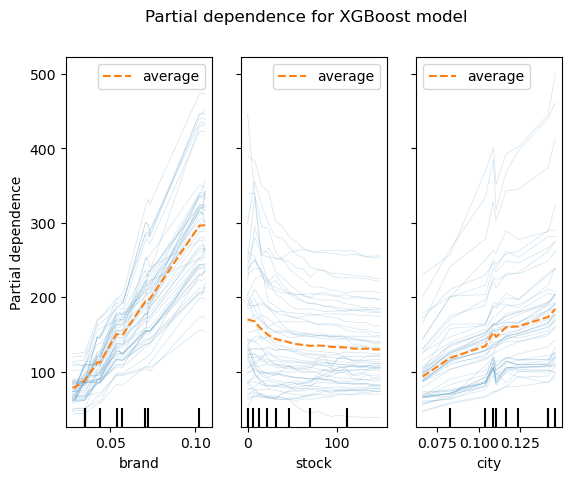

In [152]:
from sklearn.inspection import partial_dependence
from sklearn.inspection import PartialDependenceDisplay

for model, model_name in zip([regressor], ['XGBoost']):

  top_3_features = features_importance_dict[name].Feature_name[:3].values
  display = PartialDependenceDisplay.from_estimator(
    model,
    X_test,
    top_3_features,
    kind="both",
    subsample=50,
    n_jobs=3,
    n_cols=3,
    grid_resolution=20,
    random_state=0,
    ice_lines_kw={"color": "tab:blue", "alpha": 0.2, "linewidth": 0.5},
    pd_line_kw={"color": "tab:orange", "linestyle": "--"}
    )
  display.figure_.suptitle(f"Partial dependence for {model_name} model")
  display.figure_.subplots_adjust(hspace=0.3)

/usr/local/insa/anaconda/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
/usr/local/insa/anaconda/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
/usr/local/insa/anaconda/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


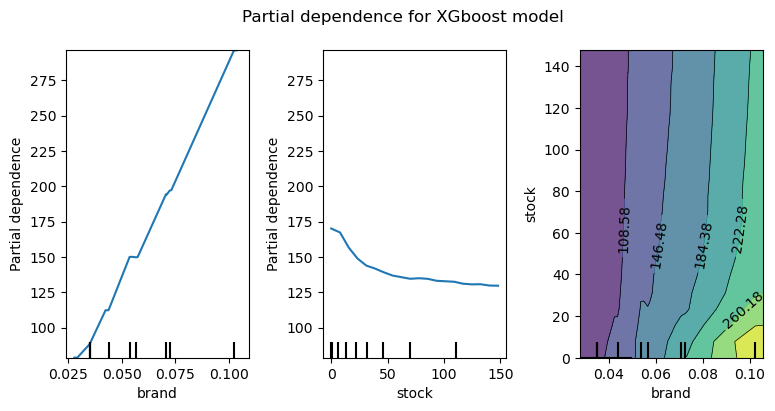

In [154]:
for model, name in zip([regressor], ['XGboost']):
  _, ax = plt.subplots(ncols=3, figsize=(9, 4))
  top_2_features = features_importance_dict[name].Feature_name[:3].values
  features = [top_2_features[0], top_2_features[1], (top_2_features[0], top_2_features[1])]
  display = PartialDependenceDisplay.from_estimator(
      model,
      X_test,
      features,
      kind="average",
      n_jobs=3,
      grid_resolution=20,
      ax=ax,
  )
  display.figure_.suptitle(f"Partial dependence for {name} model")
  display.figure_.subplots_adjust(wspace=0.4, hspace=0.3)